In [49]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import math

from sklearn.naive_bayes import GaussianNB

#### Permutations

In [3]:
# Function to calculate the number of combinations without replacement
math.factorial(36) / math.factorial(36 - 5)  # 45,239,040

45239040.0

In [4]:
# Function to calculate the number of combinations with replacement
math.pow(36, 5)  # 60,466,176

60466176.0

#### Combinations

In [5]:
# Withou repeating
math.factorial(6) / (math.factorial(2) * math.factorial(6 - 2))  # 15

15.0

In [6]:
math.factorial(6 + 2 - 1) / (math.factorial(2) * math.factorial(6 - 1))  # 21

21.0

#### Itersection

In [7]:
a = (0, 1, 2, 3, 4, 5, 6, 7)
b = (0, 2, 4, 6, 8)

In [8]:
# set(a).intersection(set(b))  # {0, 2, 4, 6}
set(a) & set(b)  # {0, 2, 4, 6}

{0, 2, 4, 6}

#### Union

In [9]:
set(a) | set(b)  # {0, 1, 2, 3, 4, 5, 6, 7, 8}

{0, 1, 2, 3, 4, 5, 6, 7, 8}

#### Diference

In [10]:
set(a).difference(set(b))  # {1, 3, 5, 7}

{1, 3, 5, 7}

In [11]:
set(b).difference(set(a))  # {8}

{8}

#### Probability - Normal Distribution

In [12]:
height_data = np.array(
    [
        126.0,
        129.5,
        133.0,
        133.0,
        136.5,
        136.5,
        140.0,
        140.0,
        140.0,
        140.0,
        143.5,
        143.5,
        143.5,
        143.5,
        143.5,
        143.5,
        147.0,
        147.0,
        147.0,
        147.0,
        147.0,
        147.0,
        147.0,
        150.5,
        150.5,
        150.5,
        150.5,
        150.5,
        150.5,
        150.5,
        150.5,
        154.0,
        154.0,
        154.0,
        154.0,
        154.0,
        154.0,
        154.0,
        154.0,
        154.0,
        157.5,
        157.5,
        157.5,
        157.5,
        157.5,
        157.5,
        157.5,
        157.5,
        157.5,
        157.5,
        161.0,
        161.0,
        161.0,
        161.0,
        161.0,
        161.0,
        161.0,
        161.0,
        161.0,
        161.0,
        164.5,
        164.5,
        164.5,
        164.5,
        164.5,
        164.5,
        164.5,
        164.5,
        164.5,
        168.0,
        168.0,
        168.0,
        168.0,
        168.0,
        168.0,
        168.0,
        168.0,
        171.5,
        171.5,
        171.5,
        171.5,
        171.5,
        171.5,
        171.5,
        175.0,
        175.0,
        175.0,
        175.0,
        175.0,
        175.0,
        178.5,
        178.5,
        178.5,
        178.5,
        182.0,
        182.0,
        185.5,
        185.5,
        189.0,
        192.5,
    ]
)

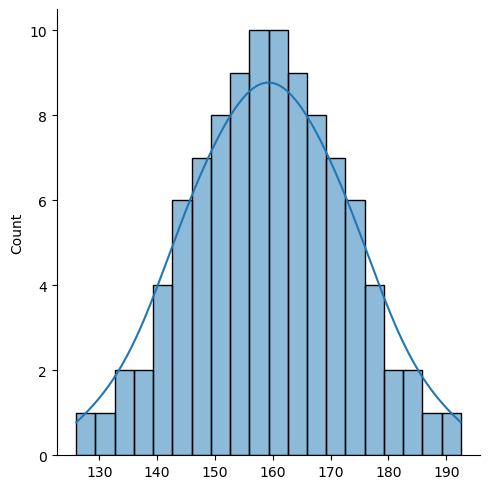

In [13]:
sns.displot(height_data, bins=20, kde=True)

In [14]:
height_mean = np.mean(height_data)
height_std = np.std(height_data)

height_mean, height_std

(159.25, 13.65)

In [15]:
np.quantile(height_data, [0.25, 0.5, 0.75])

array([150.5 , 159.25, 168.  ])

In [16]:
# Z-score Q1
(np.quantile(height_data, 0.25) - height_mean) / height_std 

# Propability to 0.25: 0.26109

-0.641025641025641

In [17]:
# Z-score Q3
(np.quantile(height_data, 0.75) - height_mean) / height_std 

# Propability to 0.25: 0.73891

0.641025641025641

In [18]:
# Z-score 1 - Q3
1 - 0.73891

0.26109000000000004

In [19]:
# Z-score Q2
(np.quantile(height_data, 0.5) - height_mean) / height_std

# Propability to 0.0: 0.50000

0.0

In [20]:
# Z-score Q2
0.73891 - 0.50000

0.23890999999999996

In [21]:
# Propability to Q1 or Q3
0.26109 + 0.26109

0.52218

In [22]:
# Probability not to Q1 or Q3
1 - (0.26109 + 0.26109)  # 0.47782

0.47782

#### Using Stats

In [23]:
# Q1
stats.norm.cdf(150.5, loc=height_mean, scale=height_std)

0.26075301195608336

In [24]:
# Q3
stats.norm.cdf(168.0, loc=height_mean, scale=height_std), 1 - stats.norm.cdf(168.0, loc=height_mean, scale=height_std), stats.norm.sf(168.0, loc=height_mean, scale=height_std)

(0.7392469880439166, 0.26075301195608336, 0.26075301195608336)

In [25]:
# Between Q2 and Q3
stats.norm.cdf(168.0, loc=height_mean, scale=height_std), stats.norm.cdf(150.5, loc=height_mean, scale=height_std), stats.norm.cdf(168.0, loc=height_mean, scale=height_std) - stats.norm.cdf(150.5, loc=height_mean, scale=height_std)

(0.7392469880439166, 0.26075301195608336, 0.4784939760878333)

### Exercise

#### 1

In [26]:
X = 40
ex_mean = 24
ex_std = 8

In [27]:
ex_stand = (X - ex_mean) / ex_std

ex_stand # z-score: 0.97725

2.0

In [28]:
0.97725, stats.norm.cdf(2.0)

(0.97725, 0.9772498680518208)

In [29]:
stats.norm.cdf(X, loc=ex_mean, scale=ex_std)

0.9772498680518208

#### 2

In [30]:
1 - stats.norm.cdf(35000, loc=38000, scale=3000), stats.norm.sf(35000, loc=38000, scale=3000)

(0.8413447460685429, 0.8413447460685429)

In [31]:
1 - stats.norm.cdf(44000, loc=38000, scale=3000), stats.norm.sf(44000, loc=38000, scale=3000) * 100

(0.02275013194817921, 2.2750131948179195)

#### Using coins

In [32]:
n = 10
x = 5
P = 0.5

In [33]:
(math.factorial(n) / (math.factorial(x) * math.factorial(n - x))) * (P ** x) * ((1 - P) ** (n - x))

0.24609375

In [34]:
stats.binom.pmf(x, n, P)

0.24609375000000003

In [35]:
n = 10
x = 7
P = 0.7

stats.binom.pmf(x, n, P)

0.26682793200000005

In [36]:
n = 50
x = 1
P = 0.05

stats.binom.pmf(x, n, P)

0.2024867770439825

In [37]:
n = 50
x = 0
P = 0.05

stats.binom.pmf(x, n, P)

0.07694497527671336

In [39]:
x = 14
p_mean = 10
euler = math.e

p = math.pow(euler, -p_mean) * math.pow(p_mean, x) / math.factorial(x)

p


0.05207710444602621

In [40]:
stats.poisson.pmf(x, p_mean)

0.05207710444602615

#### Exercise 2

In [41]:
x = 1
e_mean = 0.05

stats.poisson.pmf(x, e_mean)

0.04756147122503571

In [43]:
x = 0
e_mean = 0.05

stats.poisson.pmf(x, e_mean)

0.951229424500714

In [44]:
x = 5
e_mean = 50

stats.poisson.pmf(x, e_mean)

5.02278606240605e-16

#### Probability in machine learning

In [51]:
data_credit = pd.read_csv("data/credit_data.csv")

data_credit.dropna(inplace=True)

data_credit.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [52]:
X = data_credit.iloc[:, 1:4].values

y = data_credit.iloc[:, 4].values

In [53]:
naive_bayes = GaussianNB()

naive_bayes.fit(X, y)

GaussianNB()

In [54]:
X[0], X[0].shape

(array([6.61559251e+04, 5.90170151e+01, 8.10653213e+03]), (3,))

In [55]:
new_X = X[0].reshape(1, -1)

new_X.shape

(1, 3)

In [56]:
naive_bayes.predict(new_X)

array([0])

In [57]:
prob = naive_bayes.predict_proba(new_X)

prob

array([[1.00000000e+00, 2.03924534e-10]])

In [58]:
np.argmax(prob)

0